# Social Group Homogeneity Index

### Introduction

Social groups are the foundation of human civilizaion. Since the beginning, our ancestors understood the benefits of mutual assistance and specialization provided by small-sized groups.

Nevertheless, any social group is so called "homogenous", which means that not every relationship among their members has the same "intensity" of one another. There are atractors with higher social skills and peripherals individuals who are strongly connected with just a few others.

In that way, we aim to develop a framework to gauge precisely who are the most influencial participants (and by how much) and the "inequality" of these two-by-two connections. 

### Methodology

#### PageRank Algorithm

In order to tackle the challange to classify the members regarding their social influence in the group, it was chosen the Pagerank Alogrithm. It is an algorithm used by Google Search to rank web pages in their search engine results. 

PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

#### Gini Index

Secondly, it was adopted the Gini Index Methodology to measure the inequality of two-by-two relations.

The Gini Index is a well-known metric to gauge the income inequality of individuals nationwide.

### The Model

Let P be a group of n mutually known people, $\;P = \{p_1,p_2,...,p_n\}\;.$

The $ {n \choose 2} $ relations do not have the same intensity, such as in Graph Theory, different-weight-edges graphs are frequently adopted in applied mathemtics fields.

It's reasonable to assume that one can assess who those closest to him are. In that way, we ask each individual to give an 0 to 10 score to the n-1 other individuals, regarding their social affinity and intimacy.

Then, we have

$S_{nXn} = \begin{bmatrix}
    0 & s_{12} & \dots & s_{1n}  \\
    s_{21} & 0 & \dots & s_{2n}   \\
    \vdots & \vdots & \ddots & \vdots \\
    s_{n1} & s_{n2} & \dots & 0
    \end{bmatrix}\;$ , where $\;s_{ij} =$ score given from $i$ to $j\;\;$ and  $\;i,j \in \{1,...,n\} ,\; i \neq j\;$.


Afterwards, we define $N$ as being the normalized-columns $S$ matrix and analyse the following limit.

$\lim_{k \rightarrow \infty}\; N^{k}\;p \;= \;q\;,\;$  where $p^{T} = \left[1/n,...,1/n\right]^{*}$

$^*$ In fact, it could be any module-one vector belonging to $\mathbb{R}_{\geq 0}^{n}\;$.

The vector $q$ holds the social coefficients of each individual in the social group.

Later, it can be applied the Gini Index algorithm in the $q$ vector, when comparing with the equal-weighted $p$ vector.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Select Participants

In [3]:
n = int(input("How many people would like to do the experiment? "))
names = list()
for i in range(n):
    if i < 2:
        name = str(input("What's the name of the "+str(i+1)+"st person ? "))
        names.append(name)
    elif i < 3:
        name = str(input("What's the name of the "+str(i+1)+"rd person ? "))
        names.append(name)
    else:
        name = str(input("What's the name of the "+str(i+1)+"th person ? "))
        names.append(name)
names

['Ana', 'Bianca', 'Carla']

### Get Scores

In [4]:
scores = np.zeros((n,n))
for i in range(len(names)):
    for j in range(len(names)):
        if i == j:
            scores[i,j] = 0
        else:
            scores[i,j] = float(input(str(names[i])+ ", could you measure your intimacy or closeness to "+ str(names[j]) + " in a scale from 0 to 10?"))
scores

array([[0. , 5. , 9.5],
       [7. , 0. , 6.8],
       [8.8, 7.5, 0. ]])

### Scores Normalization

In [5]:
# All columns must sum up to 1
for j in range(n):
    sum_col = sum(scores[:,j])
    for i in range(n):
        scores[i,j] = scores[i,j]/sum_col
scores

array([[0.        , 0.4       , 0.58282209],
       [0.44303797, 0.        , 0.41717791],
       [0.55696203, 0.6       , 0.        ]])

### Pagerank Algorithm Function

In [6]:
def pagerank_algo_function(scores,epsilon=0.0001):

    # Number of participants
    n = np.shape(scores)[0]

    # Equal weighted probability vector
    prob_vector = np.full(n,1/n)

    # Output object
    dict_results = {0:np.matmul(scores,prob_vector)}
    dict_results[1] = np.matmul(scores,dict_results[0])

    # Differences list
    diff_list = list()
    for i in range(n):
        diff_list.append(abs(dict_results[1][i]-dict_results[0][i]))

    # Iteration
    i = 0
    while any(item > epsilon for item in diff_list):
        dict_results[i+2] = np.matmul(scores,dict_results[i+1])
        diff_list = list()
        for j in range(n):
            diff_list.append(abs(dict_results[i+2][j]-dict_results[i+1][j]))
        i += 1

    return dict_results
        

In [7]:
df_results = pd.DataFrame(pagerank_algo_function(scores)).T
df_results.columns = names
df_results

,Ana,Bianca,Carla
0,0.327607,0.286739,0.385654
1,0.339463,0.306029,0.354508
2,0.329027,0.298288,0.372685
3,0.336524,0.301247,0.362228
4,0.331614,0.300207,0.368180
5,0.334666,0.300514,0.364820
6,0.332831,0.300465,0.366705
7,0.333909,0.300438,0.365653
8,0.333286,0.300477,0.366237
9,0.333642,0.300444,0.365914


### Convergence Analysis

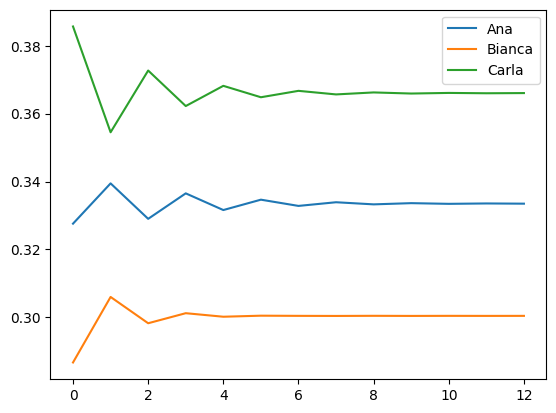

In [8]:
for enum,name in enumerate(df_results.columns):
    plt.plot(df_results[name])
    plt.legend(names)
plt.show()

### Homogeneity Index

#### Function

In [13]:
def homogeneity_index_function(results):

    # Number of participants
    n = len(results)

    # Area variables
    area_line = 0
    area_results = 0

    # Iteration
    for i in range(len(results)):
        if i == 0:
            area_line += ( (1/n) * (1/n) ) / 2
            area_results += ( (1/n) * results[i] ) / 2
        else:
            area_line += (1/n) * ( (i * 1/3) + ((i+1)*1/3) ) / 2
            area_results += (1/n) * (np.cumsum(results[:i])[-1] + np.cumsum(results[:i+1])[-1] ) / 2
    
    return (area_results*2)**n

#### Example

In [14]:
results = list(df_results.loc[df_results.index[-1]])
results.sort()
index = homogeneity_index_function(results)
print("Homogeneity Index = %.2f"%(100*index),"%")

Homogeneity Index = 87.45 %


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f062523-7425-4cba-9cee-53a7fd40ef88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>